# The Journey from Mathematics to Machine Learning

## Series 1: Linear algebra

### Episode 5: Neural network and Gradient descent (Vector Calculus)

- Simple neural networks (Jupyter Notebook)
    1. [The simplest network](#1.-The-simplest-network)
    <br>
    2. [Multiple inputs network](#2.-Multiple-inputs-network)
    <br>
    3. [Multiple outputs network](#3.-Multiple-outputs-network)
    <br> 
    4. [Multiple inputs and outputs network](#4.-Multiple-inputs-and-outputs-network)
    <br> 
    5. [Predicting on predictions (Hidden layer)](#5.-Predicting-on-predictions-(Hidden-layer))
- Neural learning (Jupyter Notebook)
    1. [Mean squared error](#1.-Mean-squared-error)
    2. [The simplest learning](#2.-The-simplest-learning)
    3. [Gradient descent](#3.-Gradient-descent)
    4. [What does it mean? (The Most IMPORTANT part)](#4.-What-does-it-mean?-The-Most-IMPORTANT-part)
- Derivatives (Mathematics)
    1. Police radar
    2. Product, Quotient, Power, and Chain rules
    3. Finding maximum or minimum
    
    

---------------

# 1. Mean squared error

<img src="Images/1.The_simplest_NN.PNG" alt="Drawing" style="width: 500px;"/>

### Import

In [1]:
import numpy as np

### Data

In [2]:
employees_experience = np.array([5.5])

right_employee = np.array([0.9])

### Network

In [3]:
def neural_network(input: float, weigth: float) -> float:
    """
    A simple neural network
    It multiplies the input by a weight
    """
    prediction = input * weigth
    return prediction

### Parameters

In [4]:
weight = 0.1

### Usage

In [5]:
input = employees_experience[0]
pred = neural_network(input, weight)
true = right_employee[0]
print(f'Prediction: {pred} \nTrue value: {true}')

Prediction: 0.55 
True value: 0.9


### Error

In [6]:
#mean squared error - big error 10 -> 100 and small error 0.01 -> 0.0001
#two inputs -> 10, -10 predict such that error = 0 Perfect ha!
error = (pred - true) ** 2
print(f'Error: {error}')

Error: 0.12249999999999998


### Learning rate parameter

In [7]:
lr = 0.01 #Learning rate

### Comparison

In [8]:
p_up = neural_network(input, weight+lr)
e_up = (p_up - true) ** 2
print(f'Up error: \t{e_up}')

print(f'Current error: \t{error}')

p_dn = neural_network(input, weight-lr)
e_dn = (p_dn - true) ** 2
print(f'Down error: \t{e_dn}')

Up error: 	0.08702500000000002
Current error: 	0.12249999999999998
Down error: 	0.16402499999999998


### Learning

In [9]:
if(e_dn < e_up):
    weight -= lr
else:
    weight += lr
print(f'Updated weight is: {weight}')

Updated weight is: 0.11


# 2. The simplest learning

<img src="https://media0.giphy.com/media/AQRapWCgC7dThyVEYb/giphy.gif?cid=ecf05e47f804q2f7c4g4as1bqifjvabzlmqdqq5k8j7ykw1c&rid=giphy.gif&ct=g" alt="Drawing" style="width: 300px;"/> 
<p style="text-align:center;">Finally, I am as intelligent as human</p>

### Data

In [26]:
employees_experience = np.array([0.5])

right_employee = np.array([0.9])

### Network

In [27]:
def neural_network(input: float, weigth: float) -> float:
    """
    A simple neural network
    It multiplies the input by a weight
    """
    prediction = input * weigth
    return prediction

### Parameters

In [28]:
weight = 0.1
lr = 0.01
epoch = 100

### Learning

In [29]:
input = employees_experience[0]
true = right_employee[0]

for iteration in range(epoch):
    pred = neural_network(input, weight)
    error = (pred - true) ** 2
    
    print(f'Error: {error:.4f} \tPrediction: {pred:.4f} \tTrue: {true} \tWeight: {weight:.4f}')
    
    p_up = neural_network(input, weight+lr)
    e_up = (p_up - true) ** 2
    
    p_dn = neural_network(input, weight-lr)
    e_dn = (p_dn - true) ** 2
    
    if(e_dn < e_up):
        weight -= lr
    else:
        weight += lr

Error: 0.7225 	Prediction: 0.0500 	True: 0.9 	Weight: 0.1000
Error: 0.7140 	Prediction: 0.0550 	True: 0.9 	Weight: 0.1100
Error: 0.7056 	Prediction: 0.0600 	True: 0.9 	Weight: 0.1200
Error: 0.6972 	Prediction: 0.0650 	True: 0.9 	Weight: 0.1300
Error: 0.6889 	Prediction: 0.0700 	True: 0.9 	Weight: 0.1400
Error: 0.6806 	Prediction: 0.0750 	True: 0.9 	Weight: 0.1500
Error: 0.6724 	Prediction: 0.0800 	True: 0.9 	Weight: 0.1600
Error: 0.6642 	Prediction: 0.0850 	True: 0.9 	Weight: 0.1700
Error: 0.6561 	Prediction: 0.0900 	True: 0.9 	Weight: 0.1800
Error: 0.6480 	Prediction: 0.0950 	True: 0.9 	Weight: 0.1900
Error: 0.6400 	Prediction: 0.1000 	True: 0.9 	Weight: 0.2000
Error: 0.6320 	Prediction: 0.1050 	True: 0.9 	Weight: 0.2100
Error: 0.6241 	Prediction: 0.1100 	True: 0.9 	Weight: 0.2200
Error: 0.6162 	Prediction: 0.1150 	True: 0.9 	Weight: 0.2300
Error: 0.6084 	Prediction: 0.1200 	True: 0.9 	Weight: 0.2400
Error: 0.6006 	Prediction: 0.1250 	True: 0.9 	Weight: 0.2500
Error: 0.5929 	Predictio

### Questions

1. Inefficient?
2. learning_rate value?
3. Purpose? -> the best weight -> direction and how much?

# 3. Gradient descent

### Data

In [38]:
employees_experience = np.array([5.5]) #Notice

right_employee = np.array([0.9])

### Network

In [35]:
def neural_network(input: float, weigth: float) -> float:
    """
    A simple neural network
    It multiplies the input by a weight
    """
    prediction = input * weigth
    return prediction

### Parameters

In [36]:
weight = 0.1
epoch = 100

### Learning

In [37]:
input = employees_experience[0]
true = right_employee[0]

for iteration in range(epoch):
    pred = neural_network(input, weight)
    error = (pred - true) ** 2
    
    delta = pred - true # Direction
    weight_delta = delta * input # Amount
    weight -= weight_delta
    
    print(f'Error: {error:.4f} \tPrediction: {pred:.4f}', 
          f'\tTrue: {true} \tWeight: {weight:.4f} \tWeight_change: {weight_delta:.4f}')

Error: 0.1225 	Prediction: 0.5500 	True: 0.9 	Weight: 2.0250 	Weight_change: -1.9250
Error: 104.8064 	Prediction: 11.1375 	True: 0.9 	Weight: -54.2812 	Weight_change: 56.3062
Error: 89668.4309 	Prediction: -298.5469 	True: 0.9 	Weight: 1592.6766 	Weight_change: -1646.9578
Error: 76716946.9523 	Prediction: 8759.7211 	True: 0.9 	Weight: -46580.8395 	Weight_change: 48173.5160
Error: 65636142926.8942 	Prediction: -256194.6170 	True: 0.9 	Weight: 1362494.5040 	Weight_change: -1409075.3435
Error: 56155822532890.9297 	Prediction: 7493719.7720 	True: 0.9 	Weight: -39852959.2921 	Weight_change: 41215453.7961
Error: 48044815915796504.0000 	Prediction: -219191276.1066 	True: 0.9 	Weight: 1165699064.2443 	Weight_change: -1205552023.5365
Error: 41105342816958636032.0000 	Prediction: 6411344853.3439 	True: 0.9 	Weight: -34096697624.1970 	Weight_change: 35262396688.4413
Error: 35168189863834163347456.0000 	Prediction: -187531836933.0835 	True: 0.9 	Weight: 997328405512.7120 	Weight_change: -103142510

### Parameters

In [39]:
weight = 0.1
epoch = 100
alpha = 0.01

<img src="https://camo.githubusercontent.com/86fe55a27055790a831633d0cca81186a77b1b82cc09141618802386b778d4dd/687474703a2f2f692e696d6775722e636f6d2f6253694e4571362e676966" alt="Drawing" style="width: 300px;"/> 

### Learning

In [40]:
input = employees_experience[0]
true = right_employee[0]

for iteration in range(epoch):
    pred = neural_network(input, weight)
    error = (pred - true) ** 2
    
    delta = pred - true
    weight_delta = delta * input
    
    weight -= weight_delta * alpha
    
    print(f'Error: {error:.4f} \tPrediction: {pred:.4f}', 
      f'\tTrue: {true} \tWeight: {weight:.4f} \tWeight_change: {weight_delta * alpha:.4f}')

Error: 0.1225 	Prediction: 0.5500 	True: 0.9 	Weight: 0.1193 	Weight_change: -0.0192
Error: 0.0596 	Prediction: 0.6559 	True: 0.9 	Weight: 0.1327 	Weight_change: -0.0134
Error: 0.0290 	Prediction: 0.7297 	True: 0.9 	Weight: 0.1420 	Weight_change: -0.0094
Error: 0.0141 	Prediction: 0.7812 	True: 0.9 	Weight: 0.1486 	Weight_change: -0.0065
Error: 0.0069 	Prediction: 0.8172 	True: 0.9 	Weight: 0.1531 	Weight_change: -0.0046
Error: 0.0033 	Prediction: 0.8422 	True: 0.9 	Weight: 0.1563 	Weight_change: -0.0032
Error: 0.0016 	Prediction: 0.8597 	True: 0.9 	Weight: 0.1585 	Weight_change: -0.0022
Error: 0.0008 	Prediction: 0.8719 	True: 0.9 	Weight: 0.1601 	Weight_change: -0.0015
Error: 0.0004 	Prediction: 0.8804 	True: 0.9 	Weight: 0.1611 	Weight_change: -0.0011
Error: 0.0002 	Prediction: 0.8863 	True: 0.9 	Weight: 0.1619 	Weight_change: -0.0008
Error: 0.0001 	Prediction: 0.8905 	True: 0.9 	Weight: 0.1624 	Weight_change: -0.0005
Error: 0.0000 	Prediction: 0.8933 	True: 0.9 	Weight: 0.1628 	Wei

### Let's learn it deeply

### Let's plot the function

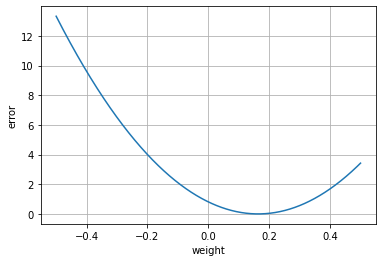

In [41]:
import matplotlib.pyplot as plt

x = np.linspace(-0.5,0.5,1000)
y = (5.5 * x - 0.9) ** 2

plt.grid()
plt.xlabel('weight')
plt.ylabel('error')
plt.plot(x,y)

# 4. What does it mean? The Most IMPORTANT part

### Still a little unsure about it? Let's plot it

In [42]:
from sympy import Symbol
x = Symbol('x')
y = (5.5 * x - 0.9) ** 2

yprime = y.diff(x)
print(yprime)

60.5*x - 9.9


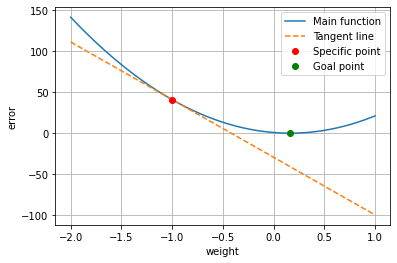

In [45]:
weight = -1
weight_lookingfor = 0.9 / 5.5 
error = (5.5 * weight - 0.9) ** 2
error_prime = 60.5 * weight - 9.9


# Define tangent line
# y = m*(x - x1) + y1
# x1 = 0, y1 = error, and m = error_prime

x = np.linspace(-2,1,1000)
y = (5.5 * x - 0.9) ** 2
tangent_line = error_prime * (x - weight) + error

plt.xlabel('weight')
plt.ylabel('error')
plt.grid()
plt.plot(x,y, label='Main function')
plt.plot(x,tangent_line, '--', label='Tangent line')
plt.plot(weight,error, 'ro', label='Specific point')
plt.plot(weight_lookingfor,0, 'go', label='Goal point')
plt.legend()